In [1]:
import os
import cv2
import numpy as np

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img.flatten())
    return np.array(images)

folder_path = './data/Test1/Apple Braeburn'
images = load_images_from_folder(folder_path)


In [2]:
mean_image = np.mean(images, axis=0)
centered_images = images - mean_image

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(centered_images)

# Variance cumulée
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Nombre de composantes pour atteindre 95% de variance expliquée
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Nombre de composantes principales à conserver pour 95% de variance expliquée : {num_components_95}")

Nombre de composantes principales à conserver pour 95% de variance expliquée : 31


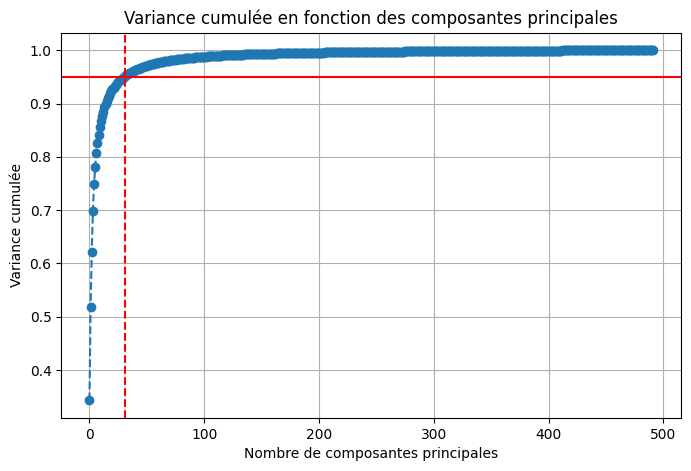

In [4]:
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance cumulée')
plt.title('Variance cumulée en fonction des composantes principales')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.axvline(x=num_components_95, color='r', linestyle='--')
plt.grid(True)
plt.show()

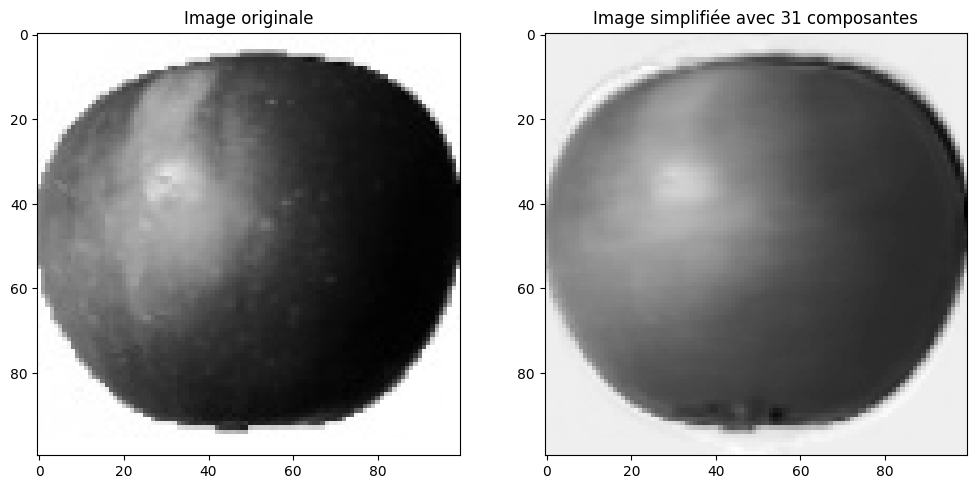

In [5]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fonction pour charger les images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img.flatten())
    return np.array(images)

# Chemin vers le dossier contenant les images
folder_path = './data/Test1/Apple Braeburn'
images = load_images_from_folder(folder_path)

# Centrer les données
mean_image = np.mean(images, axis=0)
centered_images = images - mean_image

# Appliquer PCA
pca = PCA()
pca.fit(centered_images)

# Variance cumulée et nombre de composantes pour 95% de variance expliquée
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

# Réduire les données à num_components_95 dimensions
pca_95 = PCA(n_components=num_components_95)
reduced_images = pca_95.fit_transform(centered_images)

# Reconstruction des images
reconstructed_images = pca_95.inverse_transform(reduced_images) + mean_image

# Reshape l'image reconstruite pour l'afficher
def reshape_image(flat_image, original_shape):
    return flat_image.reshape(original_shape)

# Charger une image spécifique pour la transformer
image_path = './data/Test1/Apple Braeburn/0_100.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
original_shape = original_image.shape
flat_image = original_image.flatten()

# Centrer l'image
centered_flat_image = flat_image - mean_image

# Transformer l'image en utilisant PCA
reduced_flat_image = pca_95.transform([centered_flat_image])
reconstructed_flat_image = pca_95.inverse_transform(reduced_flat_image) + mean_image

# Reshape et afficher l'image originale et simplifiée
simplified_image = reshape_image(reconstructed_flat_image[0], original_shape)

# Afficher les images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Image originale")
plt.imshow(original_image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title(f"Image simplifiée avec {num_components_95} composantes")
plt.imshow(simplified_image, cmap='gray')
plt.show()


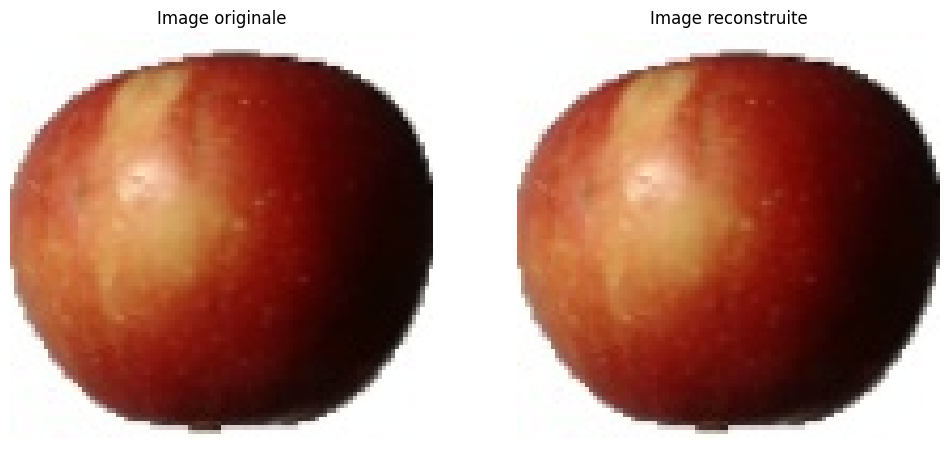

In [10]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Charger l'image en couleur
image_path = './data/Test1/Apple Braeburn/0_100.jpg'
image = cv2.imread(image_path)

# Séparer les canaux de couleur
blue, green, red = cv2.split(image)

# Préparer les données pour la PCA
blue_flat = blue.flatten().astype(float)
green_flat = green.flatten().astype(float)
red_flat = red.flatten().astype(float)

# Concaténer les canaux de couleur
data = np.column_stack((blue_flat, green_flat, red_flat))

# Centrer les données
mean_data = np.mean(data, axis=0)
centered_data = data - mean_data

# Appliquer PCA sur chaque canal de couleur
pca_blue = PCA()
pca_green = PCA()
pca_red = PCA()

pca_blue.fit(centered_data[:, 0:1])
pca_green.fit(centered_data[:, 1:2])
pca_red.fit(centered_data[:, 2:3])

# Nombre de composantes principales à conserver (par exemple, 95% de la variance expliquée)
num_components = 0.10

# Réduire les dimensions de chaque canal en fonction du nombre de composantes principales
num_components_blue = np.argmax(np.cumsum(pca_blue.explained_variance_ratio_) >= num_components) + 1
num_components_green = np.argmax(np.cumsum(pca_green.explained_variance_ratio_) >= num_components) + 1
num_components_red = np.argmax(np.cumsum(pca_red.explained_variance_ratio_) >= num_components) + 1

pca_blue = PCA(n_components=num_components_blue)
pca_green = PCA(n_components=num_components_green)
pca_red = PCA(n_components=num_components_red)

reduced_blue = pca_blue.fit_transform(centered_data[:, 0:1])
reduced_green = pca_green.fit_transform(centered_data[:, 1:2])
reduced_red = pca_red.fit_transform(centered_data[:, 2:3])

# Reconstruire les canaux de couleur réduits
reconstructed_blue = pca_blue.inverse_transform(reduced_blue) + mean_data[0]
reconstructed_green = pca_green.inverse_transform(reduced_green) + mean_data[1]
reconstructed_red = pca_red.inverse_transform(reduced_red) + mean_data[2]

# Remettre les canaux de couleur ensemble
reconstructed_image = np.column_stack((reconstructed_blue, reconstructed_green, reconstructed_red))
reconstructed_image = np.uint8(reconstructed_image.reshape(image.shape))

# Afficher l'image originale et l'image reconstruite
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image originale')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
plt.title('Image reconstruite')
plt.axis('off')
plt.show()

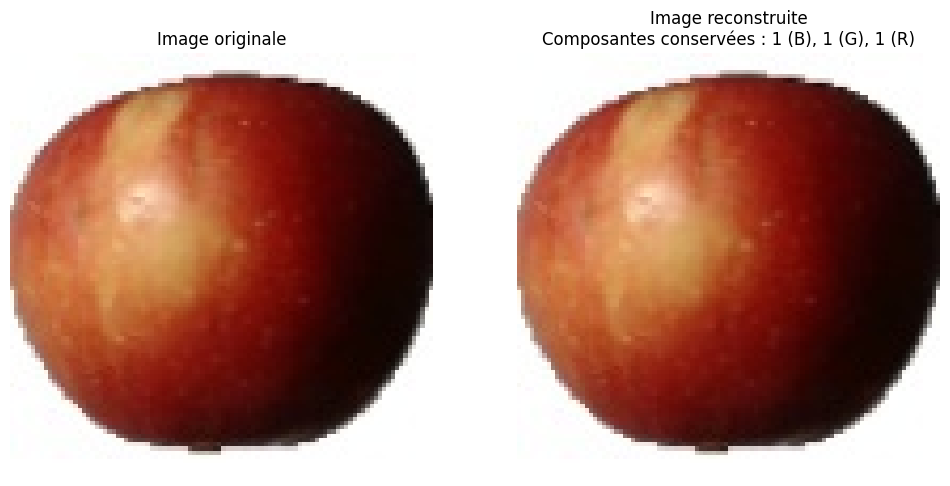

In [11]:
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Charger l'image en couleur
image_path = './data/Test1/Apple Braeburn/0_100.jpg'
image = cv2.imread(image_path)

# Séparer les canaux de couleur
blue, green, red = cv2.split(image)

# Préparer les données pour la PCA
blue_flat = blue.flatten().astype(float)
green_flat = green.flatten().astype(float)
red_flat = red.flatten().astype(float)

# Concaténer les canaux de couleur
data = np.column_stack((blue_flat, green_flat, red_flat))

# Centrer les données
mean_data = np.mean(data, axis=0)
centered_data = data - mean_data

# Appliquer PCA sur chaque canal de couleur
pca_blue = PCA()
pca_green = PCA()
pca_red = PCA()

pca_blue.fit(centered_data[:, 0:1])
pca_green.fit(centered_data[:, 1:2])
pca_red.fit(centered_data[:, 2:3])

# Nombre de composantes principales à conserver (par exemple, 95% de la variance expliquée)
num_components = 0.95

# Réduire les dimensions de chaque canal en fonction du nombre de composantes principales
num_components_blue = np.argmax(np.cumsum(pca_blue.explained_variance_ratio_) >= num_components) + 1
num_components_green = np.argmax(np.cumsum(pca_green.explained_variance_ratio_) >= num_components) + 1
num_components_red = np.argmax(np.cumsum(pca_red.explained_variance_ratio_) >= num_components) + 1

pca_blue = PCA(n_components=num_components_blue)
pca_green = PCA(n_components=num_components_green)
pca_red = PCA(n_components=num_components_red)

reduced_blue = pca_blue.fit_transform(centered_data[:, 0:1])
reduced_green = pca_green.fit_transform(centered_data[:, 1:2])
reduced_red = pca_red.fit_transform(centered_data[:, 2:3])

# Reconstruire les canaux de couleur réduits
reconstructed_blue = pca_blue.inverse_transform(reduced_blue) + mean_data[0]
reconstructed_green = pca_green.inverse_transform(reduced_green) + mean_data[1]
reconstructed_red = pca_red.inverse_transform(reduced_red) + mean_data[2]

# Remettre les canaux de couleur ensemble
reconstructed_image = np.column_stack((reconstructed_blue, reconstructed_green, reconstructed_red))
reconstructed_image = np.uint8(reconstructed_image.reshape(image.shape))

# Afficher l'image originale et l'image reconstruite avec le nombre de composantes conservées
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image originale')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
plt.title(f'Image reconstruite\nComposantes conservées : {num_components_blue} (B), {num_components_green} (G), {num_components_red} (R)')
plt.axis('off')
plt.show()
